In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("weather_linear_regression_10000.csv")

In [3]:
# Create categorical bins for crosstab analysis
df['temp_category'] = pd.cut(df['temperature_c'], bins=[0, 50, 60, 70, 100], labels=['Cold', 'Cool', 'Warm', 'Hot'])
df['humidity_category'] = pd.cut(df['humidity_percent'], bins=[10, 30, 60, 100], labels=['Low', 'Medium', 'High'])
df['rainfall_category'] = pd.cut(df['rainfall_mm'], bins=[-0.1, 0, 5, 20, 50], labels=['None', 'Light', 'Moderate', 'Heavy'])
df['wind_category'] = pd.cut(df['wind_speed_kmph'], bins=[0, 10, 20, 30, 50], labels=['Calm', 'Moderate', 'Strong', 'Very Strong'])
df['cloud_category'] = pd.cut(df['cloud_cover_percent'], bins=[0, 25, 50, 75, 100], labels=['Clear', 'Partly Cloudy', 'Mostly Cloudy', 'Overcast'])
df['sunshine_hr'] = pd.cut(df['sunshine_hours'], bins=[0, 3, 6, 9, 12], labels=['Minimal', 'Low', 'Moderate', 'High'])

In [4]:
# Crosstab 1: Temperature vs Humidity
print("Temperature vs Humidity Crosstab:")
ct1 = pd.crosstab(df['temp_category'], df['humidity_category'], normalize='index', margins=True).round(2)
ct1

Temperature vs Humidity Crosstab:


humidity_category,Low,Medium,High
temp_category,,,
Cold,0.02,0.16,0.83
Cool,0.08,0.36,0.56
Warm,0.20,0.48,0.32
Hot,0.40,0.52,0.08
All,0.13,0.38,0.49


In [5]:
# Crosstab 2: Temperature vs Rainfall (with percentages)
print("Temperature vs Rainfall Crosstab (with percentages):")
ct2 = pd.crosstab(df['temp_category'], df['rainfall_category'], normalize='index', margins=True).round(2)
ct2

Temperature vs Rainfall Crosstab (with percentages):


rainfall_category,Light,Moderate,Heavy
temp_category,,,
Cold,0.01,0.08,0.91
Cool,0.06,0.26,0.68
Warm,0.15,0.44,0.41
Hot,0.35,0.52,0.14
All,0.10,0.31,0.59


In [6]:
# Crosstab 3: Humidity vs Rainfall
print("Humidity vs Rainfall Crosstab:")
ct3 = pd.crosstab(df['humidity_category'], df['rainfall_category'], normalize='index', margins=True).round(2)
ct3

Humidity vs Rainfall Crosstab:


rainfall_category,Light,Moderate,Heavy
humidity_category,,,
Low,0.1,0.31,0.59
Medium,0.1,0.31,0.59
High,0.1,0.31,0.59
All,0.1,0.31,0.59


In [7]:
# Crosstab 4: Humidity vs Rainfall 
import matplotlib.pyplot as plt
ct4 = pd.crosstab(df['humidity_category'], df['rainfall_category'],normalize='index').round(2)
ct4

rainfall_category,Light,Moderate,Heavy
humidity_category,,,
Low,0.1,0.31,0.59
Medium,0.1,0.31,0.59
High,0.1,0.31,0.59


In [8]:
df.isnull().sum()

date                   0
humidity_percent       0
pressure_hpa           0
wind_speed_kmph        0
cloud_cover_percent    0
rainfall_mm            0
sunshine_hours         0
temperature_c          0
temp_category          0
humidity_category      0
rainfall_category      0
wind_category          0
cloud_category         0
sunshine_hr            0
dtype: int64

In [9]:
numerical_features = ['humidity_percent','pressure_hpa','wind_speed_kmph','cloud_cover_percent','rainfall_mm','sunshine_hours']

X = df[numerical_features]
y = df["temperature_c"]

#to check the data shapes and missing values
print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Missing values in target: {y.isnull().sum()}")

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Feature shape: (10000, 6)
Target shape: (10000,)
Missing values in target: 0

Training set size: 8000 samples
Test set size: 2000 samples


In [10]:
# Create preprocessing and model pipeline
weather_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

print("Pipeline created with steps:")
for step_name, step_obj in weather_pipeline.steps:
    print(f"  - {step_name}: {type(step_obj).__name__}")

Pipeline created with steps:
  - imputer: SimpleImputer
  - scaler: StandardScaler
  - model: LinearRegression


In [11]:
print("Training the model...")
weather_pipeline.fit(X_train, y_train)
print("Model training completed")

Training the model...
Model training completed


In [12]:
# Make predictions
y_train_pred = weather_pipeline.predict(X_train)
y_test_pred = weather_pipeline.predict(X_test)

# Evaluate model performance
print("="*30)
print("MODEL PERFORMANCE METRICS")
print("="*30)

print("\nTraining Set:")
print(f" R² Score: {r2_score(y_train, y_train_pred):.3f}")
print(f" RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f" MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")

print("\nTest Set:")
print(f" R² Score: {r2_score(y_test, y_test_pred):.3f}")
print(f" RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f" MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")

MODEL PERFORMANCE METRICS

Training Set:
 R² Score: 0.955
 RMSE: 1.526
 MAE: 1.219

Test Set:
 R² Score: 0.958
 RMSE: 1.487
 MAE: 1.182


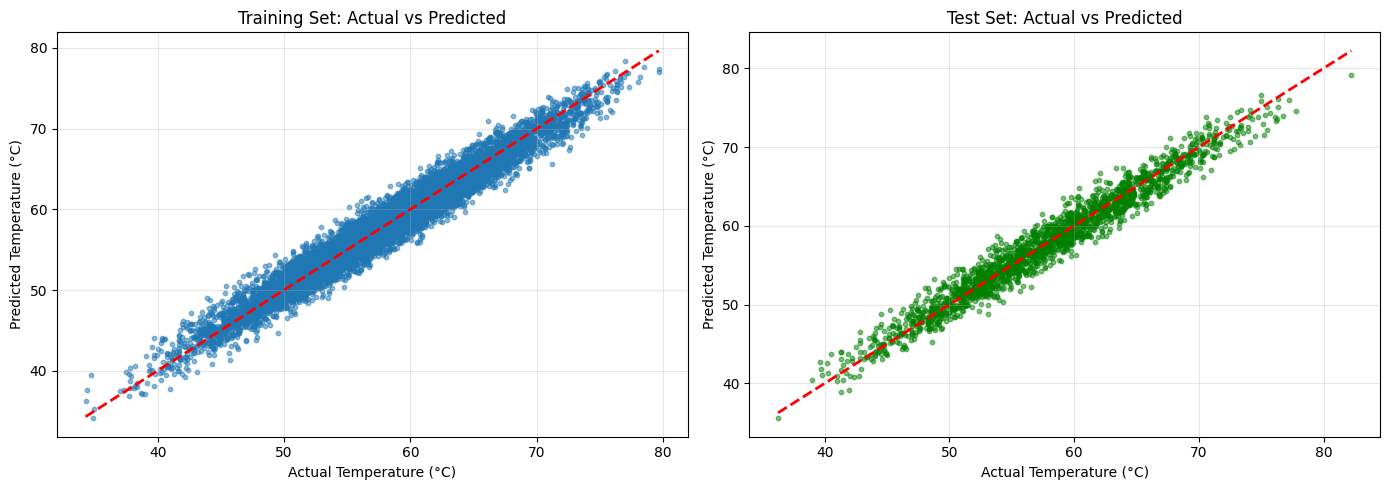

In [13]:
# Visualize predictions vs actual
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=10)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Temperature (°C)')
axes[0].set_ylabel('Predicted Temperature (°C)')
axes[0].set_title('Training Set: Actual vs Predicted')
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=10, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Temperature (°C)')
axes[1].set_ylabel('Predicted Temperature (°C)')
axes[1].set_title('Test Set: Actual vs Predicted')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Test Case 1: High humidity, high rainfall (expecting cool temperature)
test_case_1 = pd.DataFrame({
    'humidity_percent': [85.0],
    'pressure_hpa': [1013.0],
    'wind_speed_kmph': [15.0],
    'cloud_cover_percent': [80.0],
    'rainfall_mm': [25.0],
    'sunshine_hours': [2.0]
})

predicted_temp_1 = weather_pipeline.predict(test_case_1)[0]
print("="*40)
print("TEST CASE 1: Rainy, Cloudy Day")
print("="*40)

print(f"\n Predicted Temperature: {predicted_temp_1:.2f}°C")

TEST CASE 1: Rainy, Cloudy Day

 Predicted Temperature: 47.21°C


In [15]:
# Test Case 2: Low humidity, lots of sunshine (expecting hot temperature)
test_case_2 = pd.DataFrame({
    'humidity_percent': [25.0],
    'pressure_hpa': [1015.0],
    'wind_speed_kmph': [8.0],
    'cloud_cover_percent': [10.0],
    'rainfall_mm': [0.0],
    'sunshine_hours': [11.0]
})

predicted_temp_2 = weather_pipeline.predict(test_case_2)[0]
print("="*40)
print("TEST CASE 2: Sunny, Dry Day")
print("="*40)

print(f"\n Predicted Temperature: {predicted_temp_2:.2f}°C")

TEST CASE 2: Sunny, Dry Day

 Predicted Temperature: 79.79°C


In [16]:
# Test Case 3: Custom input - Try your own values!
test_case_custom = pd.DataFrame({
    'humidity_percent': [60.0],
    'pressure_hpa': [1012.0],
    'wind_speed_kmph': [12.0],
    'cloud_cover_percent': [45.0],
    'rainfall_mm': [5.0],
    'sunshine_hours': [6.5]
})

predicted_temp_custom = weather_pipeline.predict(test_case_custom)[0]
print("="*40)
print("TEST CASE 3: Moderate Conditions")
print("="*40)

print(f"\n Predicted Temperature: {predicted_temp_custom:.2f}°C")

TEST CASE 3: Moderate Conditions

 Predicted Temperature: 64.50°C
